In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.gridspec import GridSpec

## Define colourblind acessible colour palette
colour_palette = ['#FFB000','#648FFF','#785EF0',
                  '#DC267F','#FE6100','#3D1EB2',
                  '#894D80','#16AA02','#B5592B',
                  '#A3C1ED']

# 一.資料載入和合併

In [2]:
#excel_file_path = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman(2021-2023).xlsx'
excel_file_path1 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2018_trackman.xlsx'
excel_file_path2 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2019_trackman.xlsx'
excel_file_path3 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2020_trackman.xlsx'
excel_file_path4 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2021_trackman.xlsx'
excel_file_path5 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2022_trackman.xlsx'
excel_file_path6 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2023_trackman1.xlsx'
excel_file_path7 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2023_trackman2.xlsx'
excel_file_path8 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/2024_trackman.xlsx'
#sheet_name1 = '工作表1'
sheet_name = 'Sheet1'

In [3]:
#track = pd.read_excel(excel_file_path, sheet_name=sheet_name1)
track_2018 = pd.read_excel(excel_file_path1, sheet_name=sheet_name)
track_2019 = pd.read_excel(excel_file_path2, sheet_name=sheet_name)
track_2020 = pd.read_excel(excel_file_path3, sheet_name=sheet_name)
track_2021 = pd.read_excel(excel_file_path4, sheet_name=sheet_name)
track_2022 = pd.read_excel(excel_file_path5, sheet_name=sheet_name)
track_2023_1 = pd.read_excel(excel_file_path6, sheet_name=sheet_name)
track_2023_2 = pd.read_excel(excel_file_path7, sheet_name=sheet_name)
track_2024 = pd.read_excel(excel_file_path8, sheet_name=sheet_name)

In [4]:
col=['Batter','PlayResult','RunsScored','ExitSpeed','Angle','Distance','GameID','TaggedHitType','KorBB','BatterId']

In [5]:
track_2018= track_2018[col]
track_2019= track_2019[col]
track_2020= track_2020[col]
track_2021= track_2021[col]
track_2022= track_2022[col]
track_2023_1= track_2023_1[col]
track_2023_2= track_2023_2[col]
track_2024=track_2024[col]

In [6]:
data1 = pd.concat([track_2019, track_2018], ignore_index=True)
data2 = pd.concat([data1, track_2020], ignore_index=True)
data3 = pd.concat([data2, track_2021], ignore_index=True)
data4 = pd.concat([data3, track_2022], ignore_index=True)
data5 = pd.concat([data4, track_2023_1], ignore_index=True)
data6 = pd.concat([data5, track_2024], ignore_index=True)
data = pd.concat([data6, track_2023_2], ignore_index=True)

# 二.資料預處理

## 1.切出年份

In [7]:
data['Year'] = data['GameID'].str[:4]

In [8]:
year_items = data['Year'].unique()
year_items

array(['2019', '2018', '2020', '2021', '2022', '2023', '2024', nan],
      dtype=object)

## 2.擊球初速轉正數

In [9]:
data['ExitSpeed'] = data['ExitSpeed'].abs()
#data['Distance'] = data['Distance'].abs()

In [10]:
data

,Batter,PlayResult,RunsScored,ExitSpeed,Angle,Distance,GameID,TaggedHitType,KorBB,BatterId,Year
0,"Lan, Yin-Lun",Undefined,0.0,72.476293,45.066912,NaN,20190326-Brothers-1,Undefined,Undefined,1000028893.0,2019
1,"Lan, Yin-Lun",Undefined,0.0,NaN,NaN,NaN,20190326-Brothers-1,Undefined,Undefined,1000028893.0,2019
2,"Lan, Yin-Lun",Out,0.0,NaN,NaN,NaN,20190326-Brothers-1,FlyBall,Undefined,1000028893.0,2019
3,"Chen, Chen-Wei",Undefined,0.0,NaN,NaN,NaN,20190326-Brothers-1,Undefined,Undefined,1000049148.0,2019
4,"Chen, Chen-Wei",Undefined,0.0,NaN,NaN,NaN,20190326-Brothers-1,Undefined,Undefined,1000049148.0,2019
...,...,...,...,...,...,...,...,...,...,...,...
106517,"Chang, Cheng-Yu",Single,0.0,81.775520,-10.410349,16.10865,20231014-Douliu-1,GroundBall,Undefined,1000075303,2023
106518,"Chu, Hsiang-Lin",StolenBase,0.0,NaN,NaN,NaN,20231014-Douliu-1,Undefined,Undefined,1000075306,2023
106519,"Chu, Hsiang-Lin",Undefined,0.0,75.694330,74.321846,NaN,20231014-Douliu-1,Undefined,Undefined,1000075306,2023
106520,"Chu, Hsiang-Lin",Undefined,0.0,NaN,NaN,NaN,20231014-Douliu-1,Undefined,Undefined,1000075306,2023


## 3.將"KorBB"資料填入'PlayResult'和'TaggedHitType'

In [11]:
KorBB_items = data['KorBB'].unique()
KorBB_items

array(['Undefined', 'Strikeout', 'Walk', nan], dtype=object)

In [12]:
data.loc[data['KorBB'].isin(['Walk']), 'PlayResult'] = data['KorBB']
data.loc[data['KorBB'].isin(['Walk']), 'TaggedHitType'] = data['KorBB']

data.loc[data['KorBB'].isin(['Strikeout']), 'PlayResult'] = data['KorBB']
data.loc[data['KorBB'].isin(['Strikeout']), 'TaggedHitType'] = data['KorBB']

## 4.空值填入
### 依據各打擊結果之平均擊球初速,仰角和距離補充缺失值

In [13]:
mean_values = data.groupby('PlayResult')[['ExitSpeed', 'Angle', 'Distance']].transform('mean')

data['ExitSpeed'] = data['ExitSpeed'].replace(0, np.nan)
data['Angle'] = data['Angle'].replace(0, np.nan)
data['Distance'] = data['Distance'].replace(0, np.nan)

# 使用 transform 和 fillna 方法填補空值
data['ExitSpeed'] = data['ExitSpeed'].fillna(data.groupby('PlayResult')['ExitSpeed'].transform('mean'))
data['Angle'] = data['Angle'].fillna(data.groupby('PlayResult')['Angle'].transform('mean'))
data['Distance'] = data['Distance'].fillna(data.groupby('PlayResult')['Distance'].transform('mean'))

In [14]:
playresult_items = data['PlayResult'].unique()
playresult_items

array(['Undefined', 'Out', 'Single', 'Strikeout', 'Walk', 'HomeRun',
       'Double', 'Triple', 'Sacrifice', 'Error', 'FieldersChoice',
       'CaughtStealing', nan, 'StolenBase'], dtype=object)

## 5.移除不需要的資料 
#### 1.'TaggedHitType'裡的'Undefined':可能為界外球...等等
#### 2.'PlayResult'裡的'Error','FoulBall','StolenBase','CaughtStealing','FieldersChoice'

In [15]:
result_to_remove = ['Undefined']
data = data[~data['TaggedHitType'].isin(result_to_remove)]

In [16]:
result_to_remove = ['Error','FoulBall','StolenBase','CaughtStealing','FieldersChoice']
data = data[~data['PlayResult'].isin(result_to_remove)]

## 6.計算woba 

In [17]:
conditions_tb = [(data['PlayResult']=='Single'),
                 (data['PlayResult']=='Double'),
                 (data['PlayResult']=='Triple'),
                 (data['PlayResult']=='HomeRun')]

choices_tb = [1,
              2,
              3,
              4]

## Assign Total Base Value to batted ball events. 0 for all field outs
data['tb'] = np.select(conditions_tb, choices_tb, default=0)


In [18]:
conditions_woba = [(data['PlayResult']=='Walk'),
                   (data['PlayResult']=='Single'),
                   (data['PlayResult']=='Double'),
                   (data['PlayResult']=='Triple'),
                   (data['PlayResult']=='HomeRun')]

choices_woba =    [0.623840, 
                   0.762663,
                   1.107828,
                   1.438908,
                   1.744604]

data['woba'] = np.select(conditions_woba, choices_woba, default=0)


In [19]:
#刪除空值 tb和 woba為0的錯誤資料 (利用其他欄位篩選並刪除)
data.dropna(subset=['Year'], inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26853 entries, 2 to 106521
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Batter         26853 non-null  object 
 1   PlayResult     26853 non-null  object 
 2   RunsScored     26853 non-null  float64
 3   ExitSpeed      26853 non-null  float64
 4   Angle          26853 non-null  float64
 5   Distance       26853 non-null  float64
 6   GameID         26853 non-null  object 
 7   TaggedHitType  26853 non-null  object 
 8   KorBB          26853 non-null  object 
 9   BatterId       26842 non-null  object 
 10  Year           26853 non-null  object 
 11  tb             26853 non-null  int32  
 12  woba           26853 non-null  float64
dtypes: float64(5), int32(1), object(7)
memory usage: 2.8+ MB


In [21]:
#data.to_excel('data.xlsx', index=True)

# 三.繪圖

In [22]:
final_resault = data

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

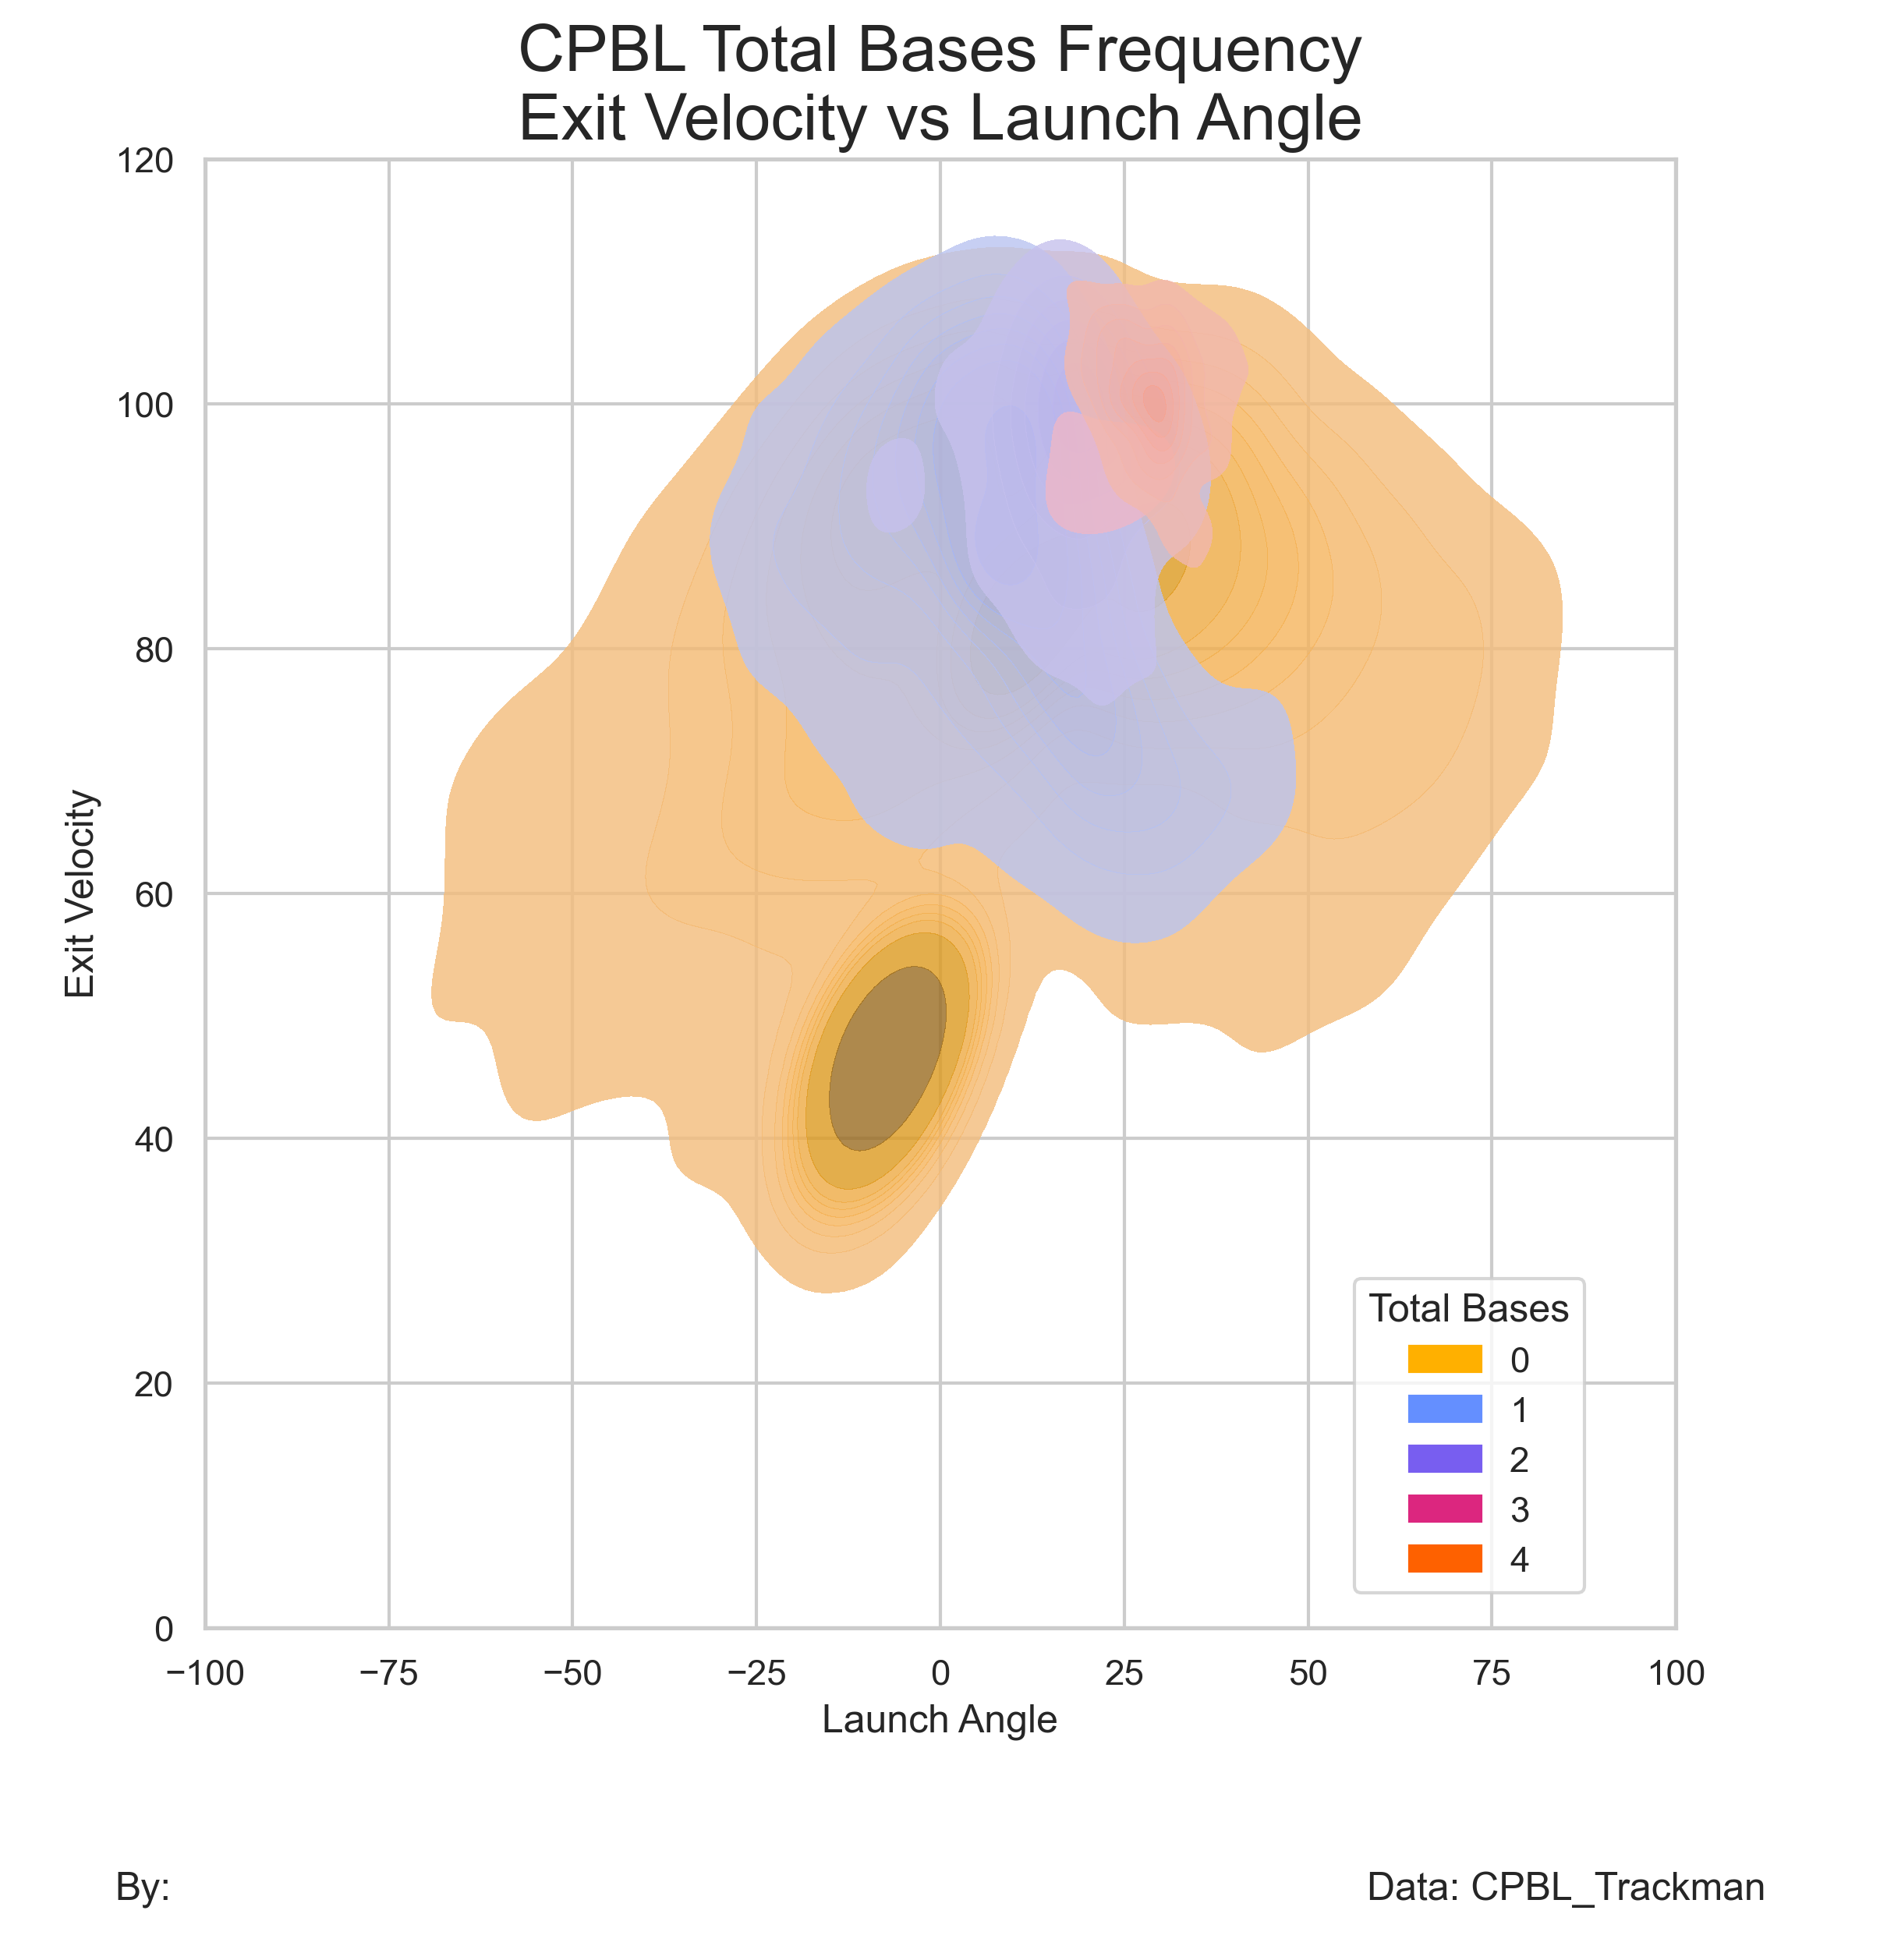

In [23]:
## Initialize plot

sns.set_theme(style="whitegrid", palette=None)
fig = plt.figure(figsize=(8,8),dpi=300)

## Create a grid of subplots to maintain layout
gs = GridSpec(2, 3, height_ratios=[10,1], width_ratios=[0.5,10,0.5])

## Add main subplot and footer subplot
ax = fig.add_subplot(gs[0, 1])
axfooter1 = fig.add_subplot(gs[-1, :])

## Define a custom palette for Total Base outcomes in KDE plot
custom_palette = {0: colour_palette[0], 1: colour_palette[1], 2: colour_palette[2], 3: colour_palette[3], 4: colour_palette[4]}

## Generate KDE plot. Sample 10000 events to avoid extended plotting period
sns.kdeplot(data=data.sample(10000),
             x='Angle',
             y='ExitSpeed',
             hue='tb',ax=ax,
             palette=custom_palette,fill=True,alpha=0.8,legend='Total Bases') 

## Adjust legend and legend title
ax.get_legend().set_title('Total Bases')
ax.get_legend().set_bbox_to_anchor([0.75,0.1,0.2,0.15])

## Add title to plot
ax.set_title('CPBL Total Bases Frequency\nExit Velocity vs Launch Angle',fontsize=20)

## Add axis labels to plot 
ax.set_xlabel('Launch Angle')
ax.set_ylabel('Exit Velocity')

## Adjust x and y-axis bounds
ax.set_ylim(0,120)
ax.set_xlim(-100,100)

## Add footer text 
axfooter1.text(.05, 0.2, "By:",ha='left', va='bottom',fontsize=12)
axfooter1.text(0.95, 0.2, "Data: CPBL_Trackman",ha='right', va='bottom',fontsize=12)
axfooter1.axis('off')


# Adjusting subplot to center it within the figure
fig.subplots_adjust(left=0.01, right=0.99, top=0.975, bottom=0.025)

In [24]:
final_resault.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26853 entries, 2 to 106521
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Batter         26853 non-null  object 
 1   PlayResult     26853 non-null  object 
 2   RunsScored     26853 non-null  float64
 3   ExitSpeed      26853 non-null  float64
 4   Angle          26853 non-null  float64
 5   Distance       26853 non-null  float64
 6   GameID         26853 non-null  object 
 7   TaggedHitType  26853 non-null  object 
 8   KorBB          26853 non-null  object 
 9   BatterId       26842 non-null  object 
 10  Year           26853 non-null  object 
 11  tb             26853 non-null  int32  
 12  woba           26853 non-null  float64
dtypes: float64(5), int32(1), object(7)
memory usage: 2.8+ MB


In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 四.xWOBA 計算

## 特徵篩選

In [26]:
X = final_resault[['ExitSpeed', 'Angle']]
#,'Double','HomeRun','Out','Sacrifice','Single','Triple']]
y = final_resault[['tb']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

### LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# 打印预测结果
print(predictions)

[[ 0.83119068]
 [ 0.48774686]
 [-0.04340334]
 ...
 [ 0.64782482]
 [-0.04340334]
 [-0.13241268]]


In [28]:
print('accuracy:', model.score(X_test, y_test))

accuracy: 0.174892843014966


In [29]:
def predict_outcome_probability(ExitSpeed, Angle):
    prediction = model.predict([[ExitSpeed, Angle]])
    
    probability = {
        'xTB': prediction[0][0]
    }
    
    return probability

ExitSpeed = 115.9
Angle = 18.3
result = predict_outcome_probability(ExitSpeed, Angle)
print(result)

{'xTB': 1.0196174317636546}


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### KNN (最終使用此模型)

In [30]:
## Create a KNN classifier
k_value = 25 
knn = KNeighborsClassifier(n_neighbors=k_value)

## Train the model on the training data
knn.fit(X_train, y_train)

## Make predictions on the testing data
y_pred = knn.predict(X_test)

## Evaluate the performance of the model
classification_rep = classification_report(y_test, y_pred, zero_division=1)

## Print the results
print("\nClassification Report:\n", classification_rep)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      5075
           1       0.68      0.62      0.65      1194
           2       0.45      0.22      0.29       287
           3       1.00      0.00      0.00        23
           4       0.68      0.56      0.62       135

    accuracy                           0.84      6714
   macro avg       0.74      0.47      0.49      6714
weighted avg       0.82      0.84      0.82      6714



# 五.整理各球員平均EV,仰角,擊球距離,woba和xwoba

In [31]:
df_2023 = data[data['Year'] == '2023']
#df_2024 = data[data['Year'] == '2024']
#df = pd.concat([df_2023, df_2024], ignore_index=True)
df= df_2023 

In [32]:
df_2023 

,Batter,PlayResult,RunsScored,ExitSpeed,Angle,Distance,GameID,TaggedHitType,KorBB,BatterId,Year,tb,woba
75535,"Chen, Chen-Wei",Walk,0.0,7.513610,-17.673303,6.177570,20230401-Brothers-2,Walk,Walk,1000049148,2023,0,0.623840
75536,"Cheng, Chin",Sacrifice,0.0,40.680260,-6.281252,22.326450,20230401-Brothers-2,Bunt,Undefined,1000028889,2023,0,0.000000
75538,"Lin, Li",Out,0.0,81.897982,11.314589,151.961837,20230401-Brothers-2,GroundBall,Undefined,1000085741,2023,0,0.000000
75539,"Lin, Hung-Yu",Out,0.0,103.682900,5.650010,105.586620,20230401-Brothers-2,GroundBall,Undefined,1000028865,2023,0,0.000000
75544,"Yueh, Cheng-Hua",Strikeout,0.0,48.132911,-6.617715,24.019996,20230401-Brothers-2,Strikeout,Strikeout,1000073279,2023,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106508,"Shih, Kuan-Yu",Out,0.0,108.454120,16.780628,316.261870,20231014-Douliu-1,LineDrive,Undefined,1000015061,2023,0,0.000000
106510,"Jan, Cheng-Lin",Single,0.0,93.100900,-10.943877,10.869540,20231014-Douliu-1,GroundBall,Undefined,1000189981,2023,1,0.762663
106512,"Chiang, Shao-Hung",Sacrifice,0.0,29.532390,14.483546,37.544100,20231014-Douliu-1,Bunt,Undefined,1000093944,2023,0,0.000000
106517,"Chang, Cheng-Yu",Single,0.0,81.775520,-10.410349,16.108650,20231014-Douliu-1,GroundBall,Undefined,1000075303,2023,1,0.762663


In [33]:
## Calculate wOBA for batted ball events (xwOBACON)
## Predcited values are [0,1,2,3,4], which represent Total Bases.
## This list comprehension create a column in our 2023 batted ball dataset with the xwOBACON predictions
df['woba_pred']= [sum(x) for x in knn.predict_proba(df[['ExitSpeed', 'Angle']]) * ([0, 0.762663,1.107828,1.438908,1.744604])]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3656\4142220705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['woba_pred']= [sum(x) for x in knn.predict_proba(df[['ExitSpeed', 'Angle']]) * ([0, 0.762663,1.107828,1.438908,1.744604])]


In [34]:
playresult_items = df['PlayResult'].unique()
playresult_items

array(['Walk', 'Sacrifice', 'Out', 'Strikeout', 'Single', 'HomeRun',
       'Double', 'Triple'], dtype=object)

In [35]:
## Since did not alter the indices, we can assign the predicted xwOBACON to the 2023 dataset 
#df_2023['woba_pred'] = df_bip_2023['woba_pred']

## Assign a value of 0.696 to every walk in the dataset
df.loc[df['PlayResult'].isin(['walk']),'woba_pred'] = 0.623840

## Assign a value of 0.726 to every hit by pitch in the dataset
#df_2023.loc[df_2023['event_type'].isin(['hit_by_pitch']),'woba_pred'] = 0.726

## Assign a value of 0 to every Strikeout in the dataset 
df.loc[df['PlayResult'].isin(['Sacrifice','strikeout']),'woba_pred'] = 0

## Create a dataframe which is just wOBA events
df_woba = df.dropna(subset=['woba_pred'])

In [36]:
df_woba

,Batter,PlayResult,RunsScored,ExitSpeed,Angle,Distance,GameID,TaggedHitType,KorBB,BatterId,Year,tb,woba,woba_pred
75535,"Chen, Chen-Wei",Walk,0.0,7.513610,-17.673303,6.177570,20230401-Brothers-2,Walk,Walk,1000049148,2023,0,0.623840,0.030507
75536,"Cheng, Chin",Sacrifice,0.0,40.680260,-6.281252,22.326450,20230401-Brothers-2,Bunt,Undefined,1000028889,2023,0,0.000000,0.000000
75538,"Lin, Li",Out,0.0,81.897982,11.314589,151.961837,20230401-Brothers-2,GroundBall,Undefined,1000085741,2023,0,0.000000,0.000000
75539,"Lin, Hung-Yu",Out,0.0,103.682900,5.650010,105.586620,20230401-Brothers-2,GroundBall,Undefined,1000028865,2023,0,0.000000,0.593430
75544,"Yueh, Cheng-Hua",Strikeout,0.0,48.132911,-6.617715,24.019996,20230401-Brothers-2,Strikeout,Strikeout,1000073279,2023,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106508,"Shih, Kuan-Yu",Out,0.0,108.454120,16.780628,316.261870,20231014-Douliu-1,LineDrive,Undefined,1000015061,2023,0,0.000000,0.706868
106510,"Jan, Cheng-Lin",Single,0.0,93.100900,-10.943877,10.869540,20231014-Douliu-1,GroundBall,Undefined,1000189981,2023,1,0.762663,0.196846
106512,"Chiang, Shao-Hung",Sacrifice,0.0,29.532390,14.483546,37.544100,20231014-Douliu-1,Bunt,Undefined,1000093944,2023,0,0.000000,0.000000
106517,"Chang, Cheng-Yu",Single,0.0,81.775520,-10.410349,16.108650,20231014-Douliu-1,GroundBall,Undefined,1000075303,2023,1,0.762663,0.183039


In [37]:
name_mapping = {
    'Single':'1',
    'Double':'1', 
    'Triple':'1', 
    'HomeRun':'1',
    'Out':'1',
    'Sacrifice':'1',
    #'Strikeout':'0',
    }

# 新增一列"球員"，根据"Pitcher"列的值匹配中文名
df_woba ['In_Play'] = df_woba ['PlayResult'].map(name_mapping)
df_woba

,Batter,PlayResult,RunsScored,ExitSpeed,Angle,Distance,GameID,TaggedHitType,KorBB,BatterId,Year,tb,woba,woba_pred,In_Play
75535,"Chen, Chen-Wei",Walk,0.0,7.513610,-17.673303,6.177570,20230401-Brothers-2,Walk,Walk,1000049148,2023,0,0.623840,0.030507,NaN
75536,"Cheng, Chin",Sacrifice,0.0,40.680260,-6.281252,22.326450,20230401-Brothers-2,Bunt,Undefined,1000028889,2023,0,0.000000,0.000000,1
75538,"Lin, Li",Out,0.0,81.897982,11.314589,151.961837,20230401-Brothers-2,GroundBall,Undefined,1000085741,2023,0,0.000000,0.000000,1
75539,"Lin, Hung-Yu",Out,0.0,103.682900,5.650010,105.586620,20230401-Brothers-2,GroundBall,Undefined,1000028865,2023,0,0.000000,0.593430,1
75544,"Yueh, Cheng-Hua",Strikeout,0.0,48.132911,-6.617715,24.019996,20230401-Brothers-2,Strikeout,Strikeout,1000073279,2023,0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106508,"Shih, Kuan-Yu",Out,0.0,108.454120,16.780628,316.261870,20231014-Douliu-1,LineDrive,Undefined,1000015061,2023,0,0.000000,0.706868,1
106510,"Jan, Cheng-Lin",Single,0.0,93.100900,-10.943877,10.869540,20231014-Douliu-1,GroundBall,Undefined,1000189981,2023,1,0.762663,0.196846,1
106512,"Chiang, Shao-Hung",Sacrifice,0.0,29.532390,14.483546,37.544100,20231014-Douliu-1,Bunt,Undefined,1000093944,2023,0,0.000000,0.000000,1
106517,"Chang, Cheng-Yu",Single,0.0,81.775520,-10.410349,16.108650,20231014-Douliu-1,GroundBall,Undefined,1000075303,2023,1,0.762663,0.183039,1


In [38]:
player_items = df_woba['Batter'].unique()
player_items

array(['Chen, Chen-Wei', 'Cheng, Chin', 'Lin, Li', 'Lin, Hung-Yu',
       'Yueh, Cheng-Hua', 'Chiang, Kun-Yu', 'Wang, Wei-Chen',
       'Chen, Tzu-Hao', 'Chu, Yu-Hsien', 'Kuo, Yen-Wen',
       'Sung, Chia-Hsiang', 'Lin, Shu-Yi', 'Chang, Chih-Hao',
       'Pena, Francisco', 'Ma, Chieh-Sen', 'Yueh, Tung-Hua',
       'Liang, Chia-Jung', 'Chen, Wen-Chieh', 'Liao, Chien-Fu',
       'Lin, Cheng-Fei', 'Tseng, Sung-En', 'Kao, Yu-Chieh', 'Li, Kai-Wei',
       'Giljegiljaw, Kungkuan', 'Kuo, Tien-Hsin', 'Lin, Chih-Sheng',
       'Chen, Pin-Chieh', 'Liu, Chi-Hung', 'Lin, Hsiao-Cheng',
       'Kao, Hsiao-Yi', 'Chang, Cheng-Yu', 'Huang, Wei-Cheng',
       'Pan, Chih-Fang', 'Ou, Chin', 'Chen, Chieh-Hsien',
       'Lin, Tzu-Chieh', 'Hu, Chin-Lung', 'Lin, Tzu Hao',
       'Su, Chih-Chieh', 'Li, Cheng-Ling', 'Lin, Yi-Chuan', 'Lin, Dai-An',
       'Lin, Ching-Kai', 'Ho, Heng-Yu', 'Chen, Chung Yu',
       'Tang, Chao-Ting', 'Chen, Yung Chi', 'Chiu, Chih-Cheng',
       'Chiu, Tan', 'Sung, Cheng-Jui', 'Lin,

In [39]:
## Groupby Batter ID and Name to calculate wOBA and xwOBA for all players during 2023 MLB Season
df_output = df_woba.groupby(['Batter']).agg(
    #EV = ('ExitSpeed','mean'),
    #Angle = ('Angle','mean'),
    #Distance = ('Distance','mean'),
    woba_pa = ('woba_pred','count'),
    woba = ('woba','mean'),
    xwoba = ('woba_pred','mean'))

## Only include batters with at least 100 wOBA PA
#df_output = df_output[df_output['woba_pa'] > 100]
    
## Display the top 20
#df_2023_output[df_2023_output['woba_pa'] > 100].sort_values(by='xwoba',ascending=False).head(20)

In [40]:
df_output

,woba_pa,woba,xwoba
Batter,,,
"Chan, Tzu-Hsien",208,0.317153,0.221674
"Chang, Cheng-Yu",85,0.256053,0.177811
"Chang, Chih-Hao",147,0.276949,0.203011
"Chang, Hao-Wei",3,0.207947,0.000000
"Chang, Jen-Wei",42,0.217478,0.145042
...,...,...,...
"Yao, Kuan-Wei",32,0.275094,0.154850
"Yen, Hung-Chun",22,0.262059,0.165600
"Yu, Te-Lung",12,0.271416,0.160586


In [41]:
df_output2 = df_woba.groupby(['Batter','In_Play']).agg(
    EV = ('ExitSpeed','mean'),
    Angle = ('Angle','mean'),
    Distance = ('Distance','mean')
)

df_output2

,,EV,Angle,Distance
Batter,In_Play,,,
"Chan, Tzu-Hsien",1,82.903736,13.358544,168.141907
"Chang, Cheng-Yu",1,80.334752,0.121817,139.435927
"Chang, Chih-Hao",1,87.445812,22.629519,188.467399
"Chang, Hao-Wei",1,85.248645,52.794595,224.416355
"Chang, Jen-Wei",1,77.855724,0.301587,129.266580
...,...,...,...,...
"Yao, Kuan-Wei",1,76.345346,26.737579,164.871554
"Yen, Hung-Chun",1,84.253404,16.688866,209.147653
"Yu, Te-Lung",1,80.827925,13.351692,164.643523


In [42]:
#df_output2.to_excel('df_output2.xlsx', index=True)

In [43]:
merged_df = df_output.merge(df_output2, on='Batter')

In [44]:
merged_df

,woba_pa,woba,xwoba,EV,Angle,Distance
Batter,,,,,,
"Chan, Tzu-Hsien",208,0.317153,0.221674,82.903736,13.358544,168.141907
"Chang, Cheng-Yu",85,0.256053,0.177811,80.334752,0.121817,139.435927
"Chang, Chih-Hao",147,0.276949,0.203011,87.445812,22.629519,188.467399
"Chang, Hao-Wei",3,0.207947,0.000000,85.248645,52.794595,224.416355
"Chang, Jen-Wei",42,0.217478,0.145042,77.855724,0.301587,129.266580
...,...,...,...,...,...,...
"Yao, Kuan-Wei",32,0.275094,0.154850,76.345346,26.737579,164.871554
"Yen, Hung-Chun",22,0.262059,0.165600,84.253404,16.688866,209.147653
"Yu, Te-Lung",12,0.271416,0.160586,80.827925,13.351692,164.643523


In [45]:
merged_df['EV(KM)'] = merged_df['EV']*1.609

In [46]:
merged_df.reset_index(drop=False, inplace=True)

In [47]:
merged_df

,Batter,woba_pa,woba,xwoba,EV,Angle,Distance,EV(KM)
0,"Chan, Tzu-Hsien",208,0.317153,0.221674,82.903736,13.358544,168.141907,133.392111
1,"Chang, Cheng-Yu",85,0.256053,0.177811,80.334752,0.121817,139.435927,129.258616
2,"Chang, Chih-Hao",147,0.276949,0.203011,87.445812,22.629519,188.467399,140.700312
3,"Chang, Hao-Wei",3,0.207947,0.000000,85.248645,52.794595,224.416355,137.165070
4,"Chang, Jen-Wei",42,0.217478,0.145042,77.855724,0.301587,129.266580,125.269861
...,...,...,...,...,...,...,...,...
117,"Yao, Kuan-Wei",32,0.275094,0.154850,76.345346,26.737579,164.871554,122.839662
118,"Yen, Hung-Chun",22,0.262059,0.165600,84.253404,16.688866,209.147653,135.563727
119,"Yu, Te-Lung",12,0.271416,0.160586,80.827925,13.351692,164.643523,130.052132
120,"Yueh, Cheng-Hua",228,0.303342,0.224602,81.657290,11.842631,168.824659,131.386579


#### 匯出檔案

In [48]:
#merged_df.to_excel('xWOBA(2023).xlsx', index=True)

# 六.繪圖2

Text(0.21, 0.475, '$R^{2}$ = 0.30')

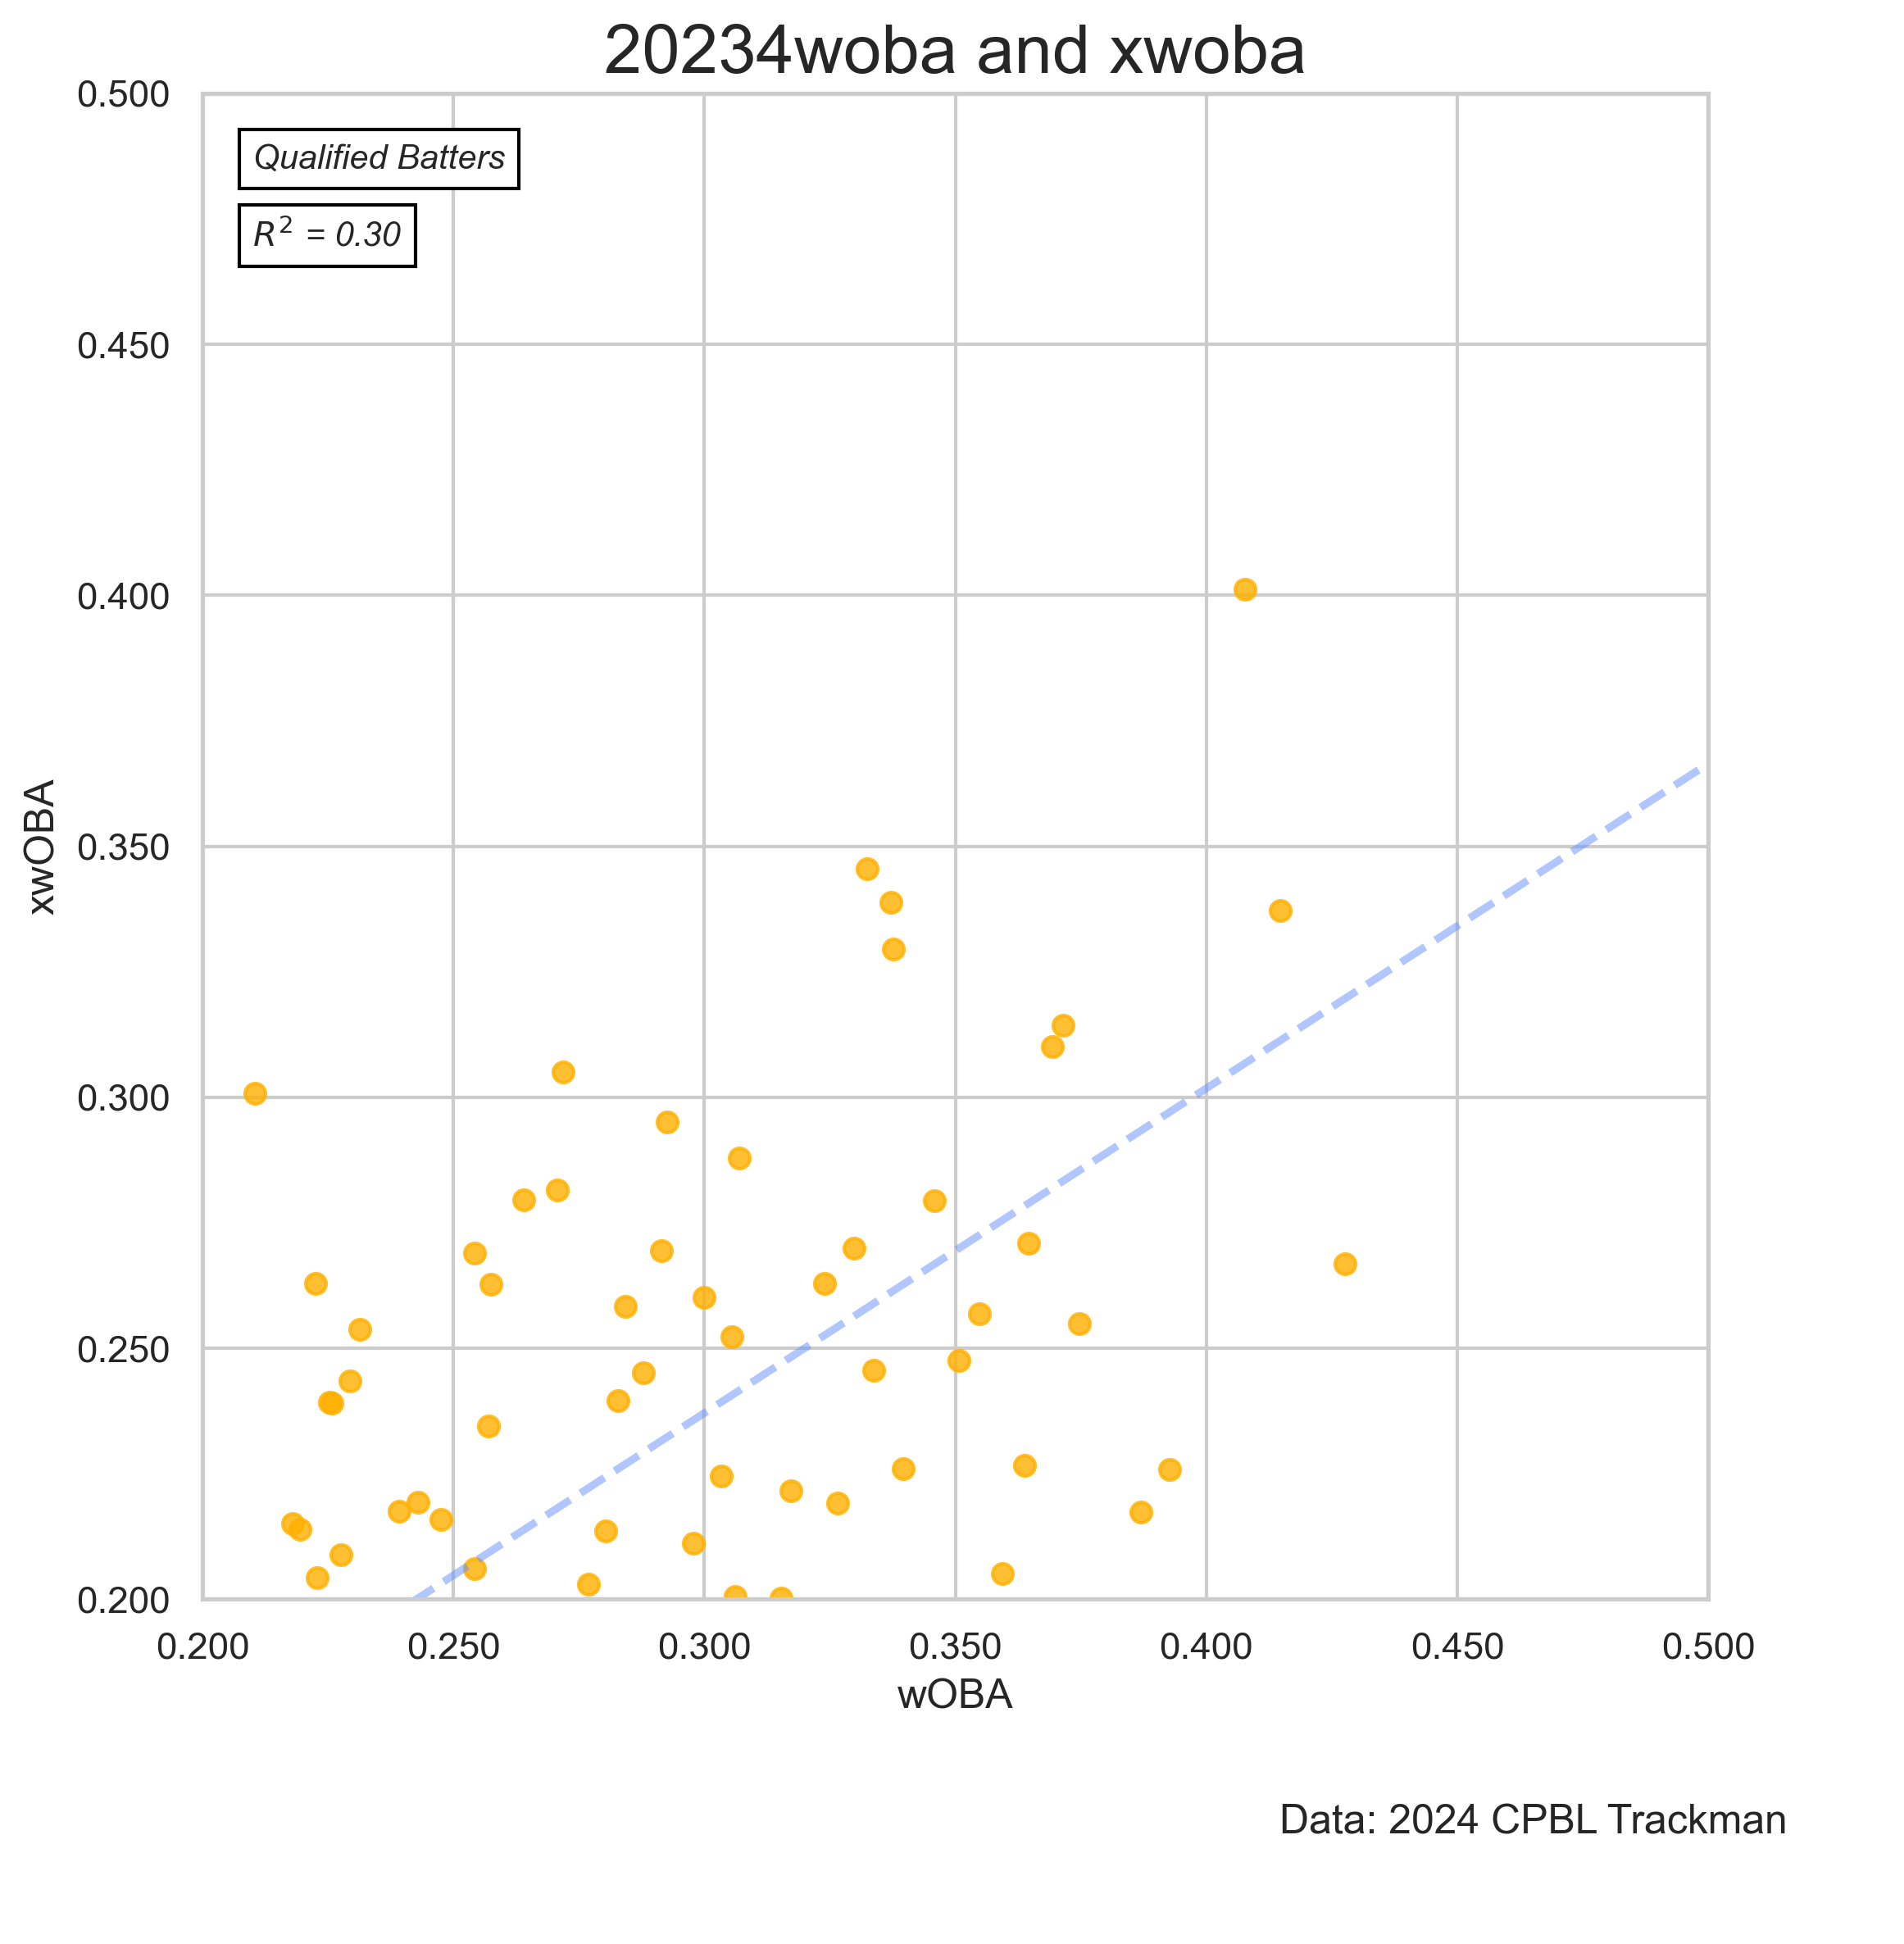

In [49]:
## Initialize Plot
sns.set_theme(style="whitegrid", palette="pastel")
fig = plt.figure(figsize=(8,8),dpi=300)

## Create a grid of subplots to maintain layout
gs = GridSpec(2, 3, height_ratios=[12,1], width_ratios=[0.5,12,0.5])

## Add main subplot and footer subplot
ax = fig.add_subplot(gs[0, 1])
axfooter1 = fig.add_subplot(gs[-1, :])

## Plot Regression plot
sns.regplot(data=df_output,
             x='woba',
             y='xwoba',
             #color=colour_palette[0],
            scatter_kws={"color": colour_palette[0]},  # Set color of scatter points
            line_kws={"color": colour_palette[1],"linestyle":'dashed',"alpha":0.5},ci=None,ax=ax) 

## Make axis square
ax.axis('square')

## Define x and y bounds
ax.set_xlim(0.2,0.5)
ax.set_ylim(0.2,0.5)

## Import function to format x and y ticks 
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

## Add Title
ax.set_title('20234woba and xwoba',fontsize=20)

## Set Labels
ax.set_xlabel('wOBA')
ax.set_ylabel('xwOBA')

## Add fotter text
#axfooter1.text(.05, 0.6,ha='left', va='bottom',fontsize=12)
axfooter1.text(0.95, 0.6, "Data: 2024 CPBL Trackman",ha='right', va='bottom',fontsize=12)
axfooter1.axis('off')

## Adjusting subplot to center it within the figure
fig.subplots_adjust(left=0.03, right=0.97, top=0.97, bottom=0.03)

## Add text with information regarding data points shown and correlation
ax.text(x=0.21,
        y=0.49,
        s=f'Qualified Batters',
        fontsize='10',
        fontstyle='oblique',
        va='top',
        bbox=dict(facecolor='white', edgecolor='black'))

ax.text(x=0.21,
        y=0.475,
        s=r"$R^{2}$" + f" = {r2_score(df_output['xwoba'],df_output['woba']):.2f}",
        fontsize='10',
        fontstyle='oblique',
        va='top',
        bbox=dict(facecolor='white', edgecolor='black'))

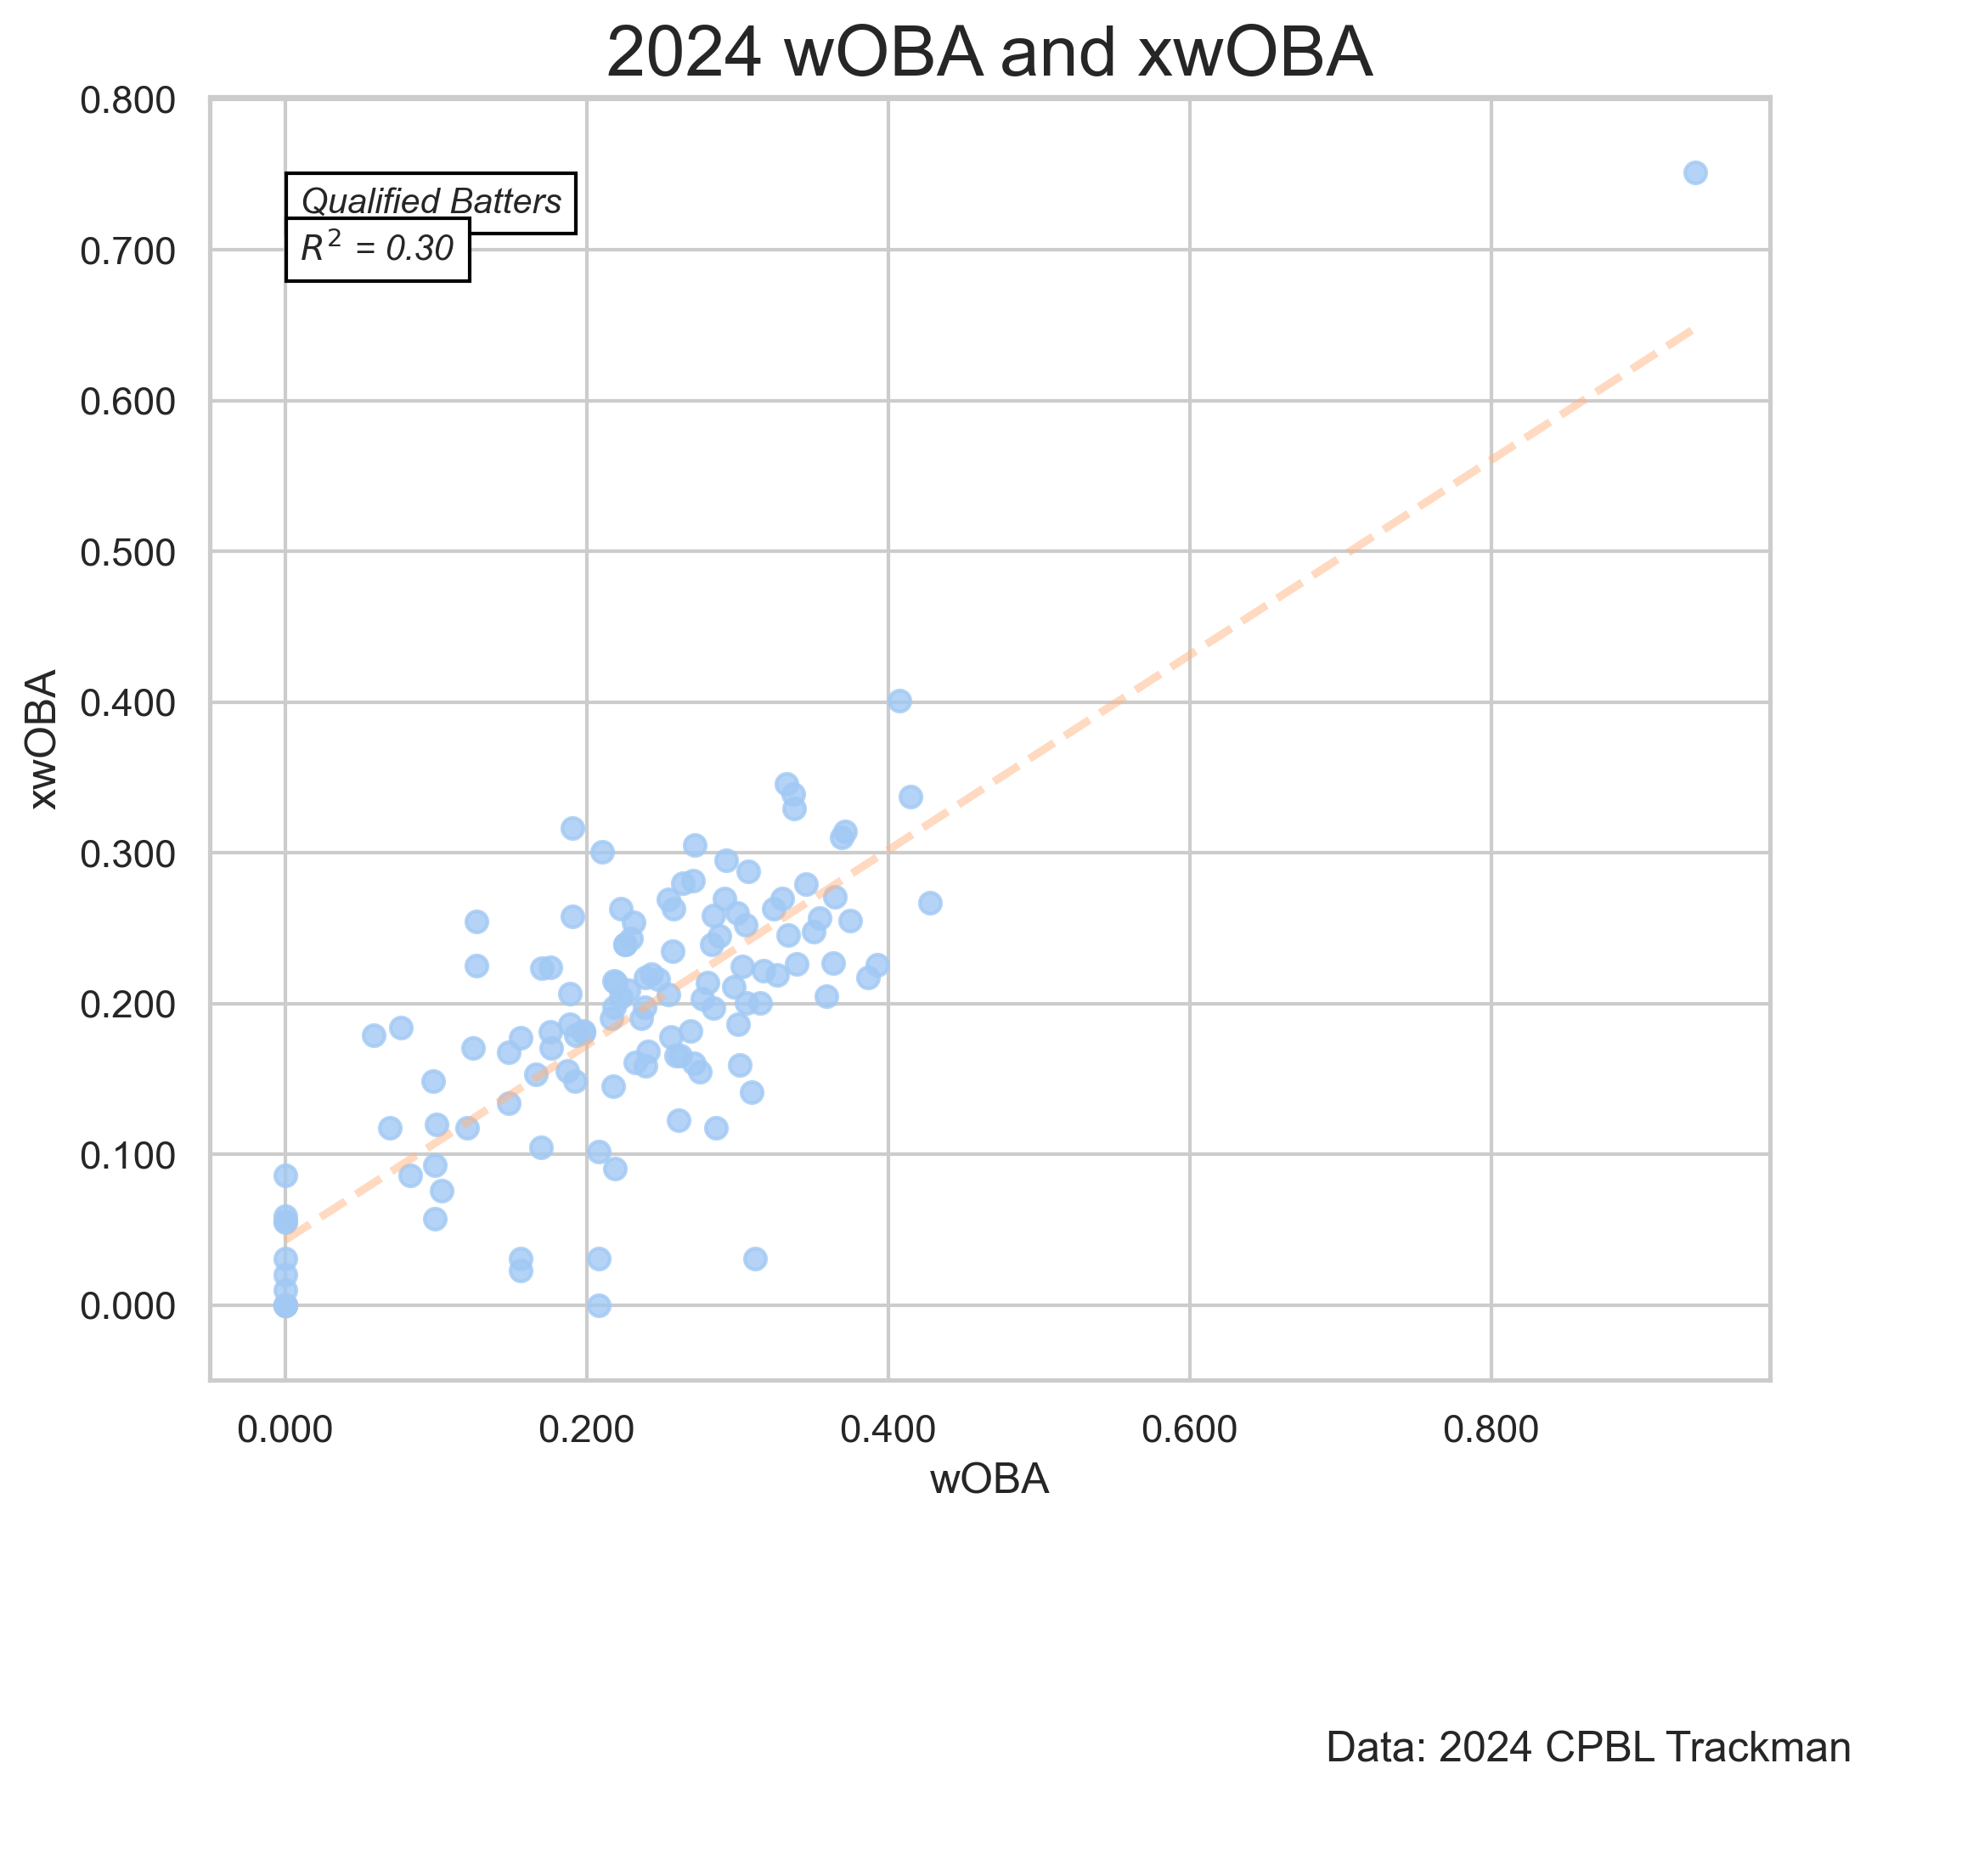

In [50]:
colour_palette = sns.color_palette("pastel")

## Initialize Plot
sns.set_theme(style="whitegrid", palette="pastel")
fig = plt.figure(figsize=(8, 8), dpi=300)

## Create a grid of subplots to maintain layout
gs = GridSpec(2, 3, height_ratios=[12, 1], width_ratios=[0.5, 12, 0.5])

## Add main subplot and footer subplot
ax = fig.add_subplot(gs[0, 1])
axfooter1 = fig.add_subplot(gs[-1, :])

## Plot Regression plot
sns.regplot(data=df_output,
            x='woba',
            y='xwoba',
            scatter_kws={"color": colour_palette[0]},  # Set color of scatter points
            line_kws={"color": colour_palette[1], "linestyle": 'dashed', "alpha": 0.5}, ci=None, ax=ax)

## Make axis square
ax.axis('square')

## Define x and y bounds
ax.set_xlim(df_output['woba'].min() - 0.05, df_output['woba'].max() + 0.05)
ax.set_ylim(df_output['xwoba'].min() - 0.05, df_output['xwoba'].max() + 0.05)

## Import function to format x and y ticks
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

## Add Title
ax.set_title('2024 wOBA and xwOBA', fontsize=20)

## Set Labels
ax.set_xlabel('wOBA')
ax.set_ylabel('xwOBA')

## Add footer text
axfooter1.text(0.95, 0.6, "Data: 2024 CPBL Trackman", ha='right', va='bottom', fontsize=12)
axfooter1.axis('off')

## Adjusting subplot to center it within the figure
fig.subplots_adjust(left=0.03, right=0.97, top=0.97, bottom=0.03)

## Add text with information regarding data points shown and correlation
ax.text(x=df_output['woba'].min() + 0.01,
        y=df_output['xwoba'].max() - 0.01,
        s=f'Qualified Batters',
        fontsize='10',
        fontstyle='oblique',
        va='top',
        bbox=dict(facecolor='white', edgecolor='black'))

ax.text(x=df_output['woba'].min() + 0.01,
        y=df_output['xwoba'].max() - 0.04,
        s=r"$R^{2}$" + f" = {r2_score(df_output['xwoba'], df_output['woba']):.2f}",
        fontsize='10',
        fontstyle='oblique',
        va='top',
        bbox=dict(facecolor='white', edgecolor='black'))

plt.show()

In [51]:
data

,Batter,PlayResult,RunsScored,ExitSpeed,Angle,Distance,GameID,TaggedHitType,KorBB,BatterId,Year,tb,woba
2,"Lan, Yin-Lun",Out,0.0,81.897982,11.314589,151.961837,20190326-Brothers-1,FlyBall,Undefined,1000028893.0,2019,0,0.000000
6,"Chen, Chen-Wei",Single,0.0,79.427594,5.114018,87.198944,20190326-Brothers-1,GroundBall,Undefined,1000049148.0,2019,1,0.762663
10,"Chen, Chun-Hsiu",Out,0.0,94.096695,46.074297,305.206470,20190326-Brothers-1,FlyBall,Undefined,544560.0,2019,0,0.000000
13,"Kuo, Yen-Wen",Out,0.0,95.556048,17.216426,295.967302,20190326-Brothers-1,FlyBall,Undefined,544370.0,2019,0,0.000000
15,"Wang, Wei-Chen",Out,0.0,95.442096,30.424698,354.590853,20190326-Brothers-1,FlyBall,Undefined,1000028978.0,2019,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106508,"Shih, Kuan-Yu",Out,0.0,108.454120,16.780628,316.261870,20231014-Douliu-1,LineDrive,Undefined,1000015061,2023,0,0.000000
106510,"Jan, Cheng-Lin",Single,0.0,93.100900,-10.943877,10.869540,20231014-Douliu-1,GroundBall,Undefined,1000189981,2023,1,0.762663
106512,"Chiang, Shao-Hung",Sacrifice,0.0,29.532390,14.483546,37.544100,20231014-Douliu-1,Bunt,Undefined,1000093944,2023,0,0.000000
106517,"Chang, Cheng-Yu",Single,0.0,81.775520,-10.410349,16.108650,20231014-Douliu-1,GroundBall,Undefined,1000075303,2023,1,0.762663


In [52]:
df=data

In [53]:
df['woba_pred']= [sum(x) for x in knn.predict_proba(df[['ExitSpeed', 'Angle']]) * ([0, 0.762663,1.107828,1.438908,1.744604])]

In [54]:
## Since did not alter the indices, we can assign the predicted xwOBACON to the 2023 dataset 
#df_2023['woba_pred'] = df_bip_2023['woba_pred']

## Assign a value of 0.696 to every walk in the dataset
df.loc[df['PlayResult'].isin(['walk']),'woba_pred'] = 0.623840

## Assign a value of 0.726 to every hit by pitch in the dataset
#df_2023.loc[df_2023['event_type'].isin(['hit_by_pitch']),'woba_pred'] = 0.726

## Assign a value of 0 to every Strikeout in the dataset 
df.loc[df['PlayResult'].isin(['Sacrifice','strikeout']),'woba_pred'] = 0

## Create a dataframe which is just wOBA events
df_woba = df.dropna(subset=['woba_pred'])

In [55]:
name_mapping = {
    'Single':'1',
    'Double':'1', 
    'Triple':'1', 
    'HomeRun':'1',
    'Out':'1',
    'Sacrifice':'1',
    #'Strikeout':'0',
    }

# 新增一列"球員"，根据"Pitcher"列的值匹配中文名
df_woba ['In_Play'] = df_woba ['PlayResult'].map(name_mapping)
df_woba

,Batter,PlayResult,RunsScored,ExitSpeed,Angle,Distance,GameID,TaggedHitType,KorBB,BatterId,Year,tb,woba,woba_pred,In_Play
2,"Lan, Yin-Lun",Out,0.0,81.897982,11.314589,151.961837,20190326-Brothers-1,FlyBall,Undefined,1000028893.0,2019,0,0.000000,0.000000,1
6,"Chen, Chen-Wei",Single,0.0,79.427594,5.114018,87.198944,20190326-Brothers-1,GroundBall,Undefined,1000049148.0,2019,1,0.762663,0.427091,1
10,"Chen, Chun-Hsiu",Out,0.0,94.096695,46.074297,305.206470,20190326-Brothers-1,FlyBall,Undefined,544560.0,2019,0,0.000000,0.069784,1
13,"Kuo, Yen-Wen",Out,0.0,95.556048,17.216426,295.967302,20190326-Brothers-1,FlyBall,Undefined,544370.0,2019,0,0.000000,0.783266,1
15,"Wang, Wei-Chen",Out,0.0,95.442096,30.424698,354.590853,20190326-Brothers-1,FlyBall,Undefined,1000028978.0,2019,0,0.000000,0.723298,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106508,"Shih, Kuan-Yu",Out,0.0,108.454120,16.780628,316.261870,20231014-Douliu-1,LineDrive,Undefined,1000015061,2023,0,0.000000,0.706868,1
106510,"Jan, Cheng-Lin",Single,0.0,93.100900,-10.943877,10.869540,20231014-Douliu-1,GroundBall,Undefined,1000189981,2023,1,0.762663,0.196846,1
106512,"Chiang, Shao-Hung",Sacrifice,0.0,29.532390,14.483546,37.544100,20231014-Douliu-1,Bunt,Undefined,1000093944,2023,0,0.000000,0.000000,1
106517,"Chang, Cheng-Yu",Single,0.0,81.775520,-10.410349,16.108650,20231014-Douliu-1,GroundBall,Undefined,1000075303,2023,1,0.762663,0.183039,1


In [56]:
## Groupby Batter ID and Name to calculate wOBA and xwOBA for all players during 2023 MLB Season
df_output = df_woba.groupby(['Batter']).agg(
    #EV = ('ExitSpeed','mean'),
    #Angle = ('Angle','mean'),
    #Distance = ('Distance','mean'),
    woba_pa = ('woba_pred','count'),
    woba = ('woba','mean'),
    xwoba = ('woba_pred','mean'))

In [57]:
df_output2 = df_woba.groupby(['Batter','In_Play']).agg(
    EV = ('ExitSpeed','mean'),
    Angle = ('Angle','mean'),
    Distance = ('Distance','mean')
)

df_output2

,,EV,Angle,Distance
Batter,In_Play,,,
"Batista, Xavier",1,92.650709,22.968930,152.071196
"Bernadina, Roger",1,85.226419,-6.909233,93.697491
"Chan, Chih-Yao",1,79.752857,2.978440,115.249208
"Chan, Tzu-Hsien",1,86.320811,13.322061,184.988860
"Chang, Chao-Yuan",1,71.233450,1.262854,88.932959
...,...,...,...,...
"Yu, Sen-Hsu",1,84.421402,9.830647,137.963696
"Yu, Te-Lung",1,82.801249,12.710473,158.097933
"Yueh, Cheng-Hua",1,82.159215,12.956292,168.568190


In [58]:
merged_df = df_output.merge(df_output2, on=['Batter'])

In [59]:
merged_df.reset_index(drop=False, inplace=True)

In [60]:
merged_df

,Batter,woba_pa,woba,xwoba,EV,Angle,Distance
0,"Batista, Xavier",13,0.443405,0.343002,92.650709,22.968930,152.071196
1,"Bernadina, Roger",10,0.214917,0.139695,85.226419,-6.909233,93.697491
2,"Chan, Chih-Yao",46,0.197405,0.198438,79.752857,2.978440,115.249208
3,"Chan, Tzu-Hsien",1086,0.329304,0.243833,86.320811,13.322061,184.988860
4,"Chang, Chao-Yuan",8,0.155960,0.026693,71.233450,1.262854,88.932959
...,...,...,...,...,...,...,...
226,"Yu, Sen-Hsu",76,0.292025,0.211868,84.421402,9.830647,137.963696
227,"Yu, Te-Lung",76,0.192443,0.172042,82.801249,12.710473,158.097933
228,"Yueh, Cheng-Hua",483,0.276577,0.223232,82.159215,12.956292,168.568190
229,"Yueh, Tung Hua",271,0.262023,0.207864,84.238028,7.525215,151.537204


In [61]:
#merged_df.to_excel('xWOBA(2019~2023).xlsx', index=True)

In [62]:
total_combinations = len(merged_df)
print(f"總共有 {total_combinations} 筆資料")

# 計算每個「batterId」出現的次數
batter_counts = merged_df[['Batter']].value_counts()
print("每個 Batter 的出現次數：")
print(batter_counts)

總共有 231 筆資料
每個 Batter 的出現次數：
Batter          
Batista, Xavier     1
Lin, Tzu-Chieh      1
Lin, Wang-Wei       1
Lin, Wei-En         1
Lin, Wei-Ting       1
                   ..
Hu, Chin-Lung       1
Huang, Chieh-Hsi    1
Huang, Chih-Feng    1
Huang, Ching-Wei    1
Yueh, Tung-Hua      1
Name: count, Length: 231, dtype: int64


In [63]:
batter_counts

Batter          
Batista, Xavier     1
Lin, Tzu-Chieh      1
Lin, Wang-Wei       1
Lin, Wei-En         1
Lin, Wei-Ting       1
                   ..
Hu, Chin-Lung       1
Huang, Chieh-Hsi    1
Huang, Chih-Feng    1
Huang, Ching-Wei    1
Yueh, Tung-Hua      1
Name: count, Length: 231, dtype: int64

In [64]:
#batter_counts.to_excel('batter_counts.xlsx', index=True)